In [1]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

In [2]:
Ved = pd.read_csv("Ved.csv", index_col="Date", parse_dates=["Date"])
Ved

,Price,Returns
Date,,
2014-01-01,202.0000,NaN
2014-01-02,199.8500,-0.0106
2014-01-03,199.1500,-0.0035
2014-01-06,198.9500,-0.0010
2014-01-07,194.5000,-0.0224
...,...,...
2024-01-31,273.8500,0.0285
2024-02-01,268.5000,-0.0195
2024-02-02,272.5500,0.0151


In [3]:
Ved["log_ret"] = np.log(Ved.Price / Ved.Price.shift())
Ved

,Price,Returns,log_ret
Date,,,
2014-01-01,202.0000,NaN,NaN
2014-01-02,199.8500,-0.0106,-0.0107
2014-01-03,199.1500,-0.0035,-0.0035
2014-01-06,198.9500,-0.0010,-0.0010
2014-01-07,194.5000,-0.0224,-0.0226
...,...,...,...
2024-01-31,273.8500,0.0285,0.0281
2024-02-01,268.5000,-0.0195,-0.0197
2024-02-02,272.5500,0.0151,0.0150


In [4]:
Ved.describe()

,Price,Returns,log_ret
count,2491.0000,2490.0000,2490.0000
mean,219.4668,0.0005,0.0001
std,78.6791,0.0281,0.0283
min,61.5500,-0.2043,-0.2286
25%,161.3250,-0.0135,-0.0136
50%,224.0500,0.0004,0.0004
75%,280.2500,0.0157,0.0156
max,437.7500,0.1858,0.1704


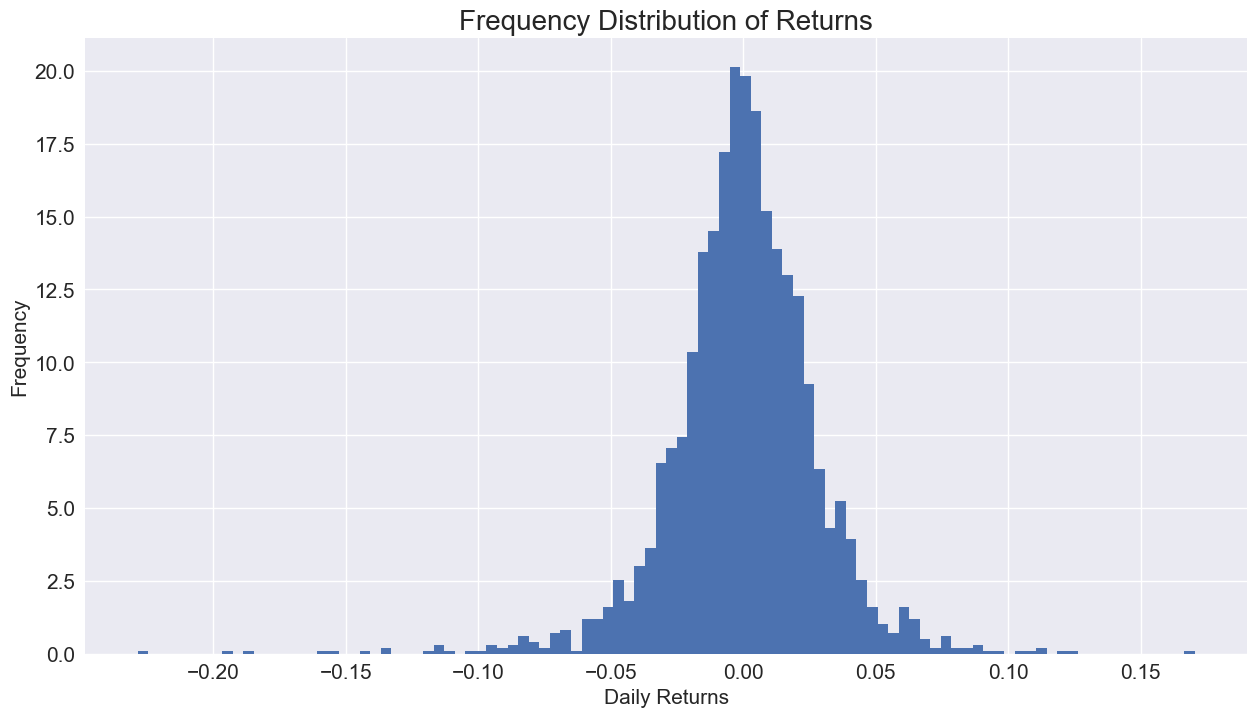

In [5]:
Ved.log_ret.plot(kind = "hist", figsize = (15,8), bins = 100, fontsize = 15, density = True) # Frequency distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

### Do MSFT Returns follow a Normal Distribution?

A normally distributed random variable can be fully described by its

    . Mean
    . Standard deviation
    
##### Higher central moments are zero:
    . Skew = 0 (measures symmetrie around the mean)
    . (Excess) Kurtosis = 0 (positive excess Kurtosis --> more observations in the "tails")

In [6]:
mu = Ved.log_ret.mean()
mu

0.0001354133334305339

In [7]:
sigma = Ved.log_ret.std()
sigma

0.028269158419403802

In [8]:
import scipy.stats as stats

In [9]:
stats.skew(Ved.log_ret.dropna()) # in a normal distribution: skew == 0

-0.693420679433228

In [10]:
stats.kurtosis(Ved.log_ret.dropna(), fisher= True) # In a Normal Distribution: (fisher) krutosis == 0

6.354835652647848

### MSFT Returns exhibit "Fat tails" (extreme positive / negetive outcomes). In our case Ved

In [11]:
x = np.linspace(Ved.log_ret.min(), Ved.log_ret.max(), 10000)
x

array([-0.22859542, -0.22855551, -0.22851561, ...,  0.17031318,
        0.17035308,  0.17039299])

In [13]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values for a normal distribution with mu, sigma
y

array([8.58181182e-14, 8.68037754e-14, 8.78005785e-14, ...,
       1.90691659e-07, 1.89077972e-07, 1.87477567e-07])

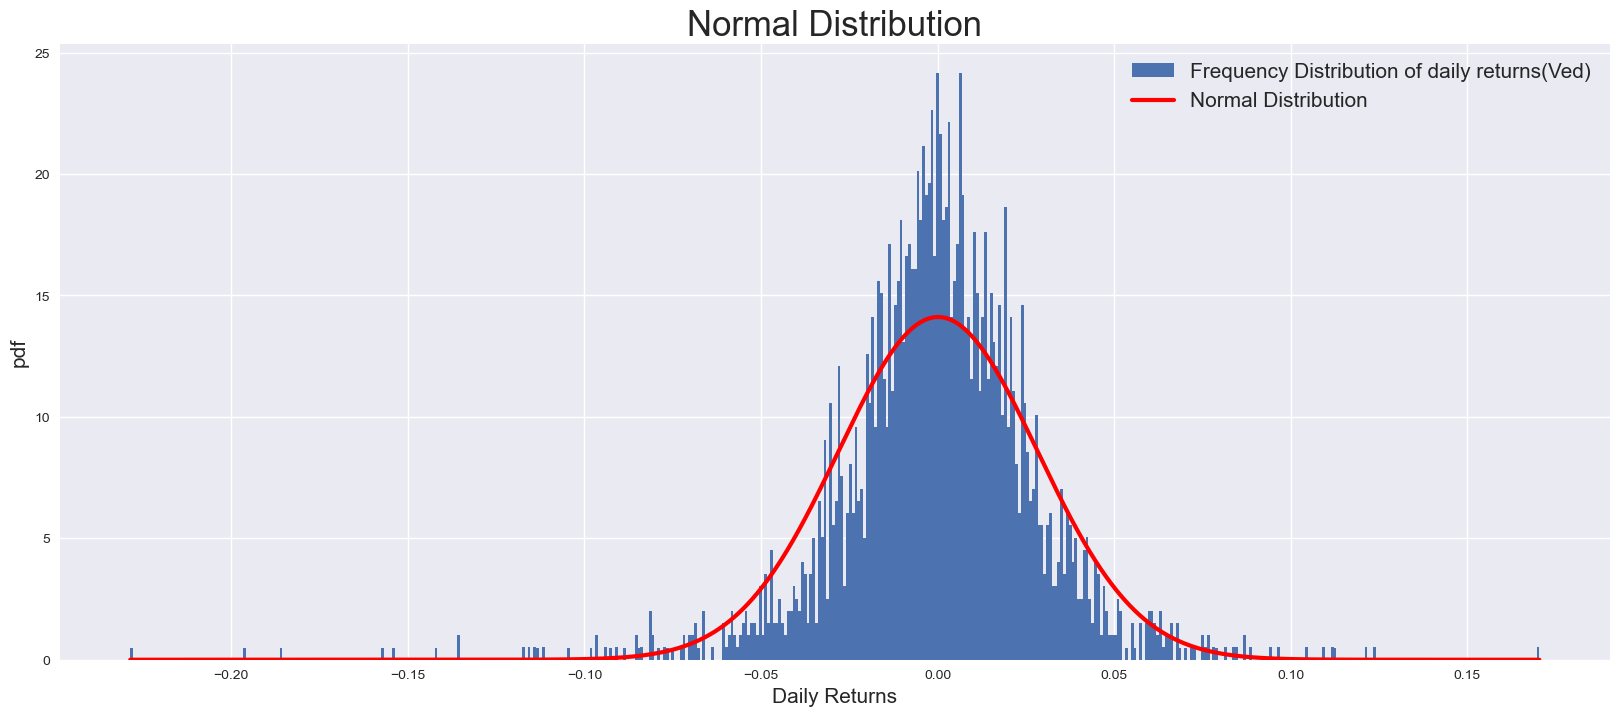

In [19]:
plt.figure(figsize=(20,8))
plt.hist(Ved.log_ret, bins=500, density=True, label="Frequency Distribution of daily returns(Ved)")
plt.plot(x ,y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 25)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

In [20]:
# Ved Returns exhibit "fat Tails" (extreme positive/ negative outcomes).
#  Testing the normality of Ved returns based on the sample (jan 2014 to till date)
#     Hypothesis Test with Ho Hypothiesis: Ved returns (full population) follow a normal distribution.

In [21]:
z_stat, p_value = stats.normaltest(Ved.log_ret.dropna())

In [22]:
z_stat # high values ---->> rejects H0

499.97520546882487

In [23]:
p_value # low value (close to zero)  --------->>> rejects H0

2.7024868426603146e-109

In [24]:
round(p_value, 10)

0.0

# Assuming that Ved returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample. 

## Take home: Ved returns don't follows a Normal distribution as they exhibit "Fat tails". Extreme Events/Outcomes are not reflected in the mean-variance analysis. The Standard Deviation of returns underestimates true Risk.